In [4]:
import pandas as pd
diagnosis_path = 'DIAGNOSES_ICD.csv'
event_path = 'NOTEEVENTS.csv'
procedures_path = 'PROCEDURES_ICD.csv'

In [5]:
dia_df = pd.read_csv(diagnosis_path)
print(dia_df.shape,'\n' ,dia_df.columns)

(651047, 5) 
 Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE'], dtype='object')


In [6]:
print(dia_df.SEQ_NUM.nunique())
dia_df.head()

39


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [7]:
event_df = pd.read_csv(event_path)
print(event_df.shape, '\n', event_df.columns)

C:\Users\singh\AppData\Local\Temp\ipykernel_5308\3219197977.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  event_df = pd.read_csv(event_path)


(2083180, 11) 
 Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT'],
      dtype='object')


In [8]:
event_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [9]:
event_df.SUBJECT_ID.nunique(), dia_df.SUBJECT_ID.nunique()

(46146, 46520)

In [10]:
categories = event_df['CATEGORY'].value_counts()
categories

CATEGORY
Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: count, dtype: int64

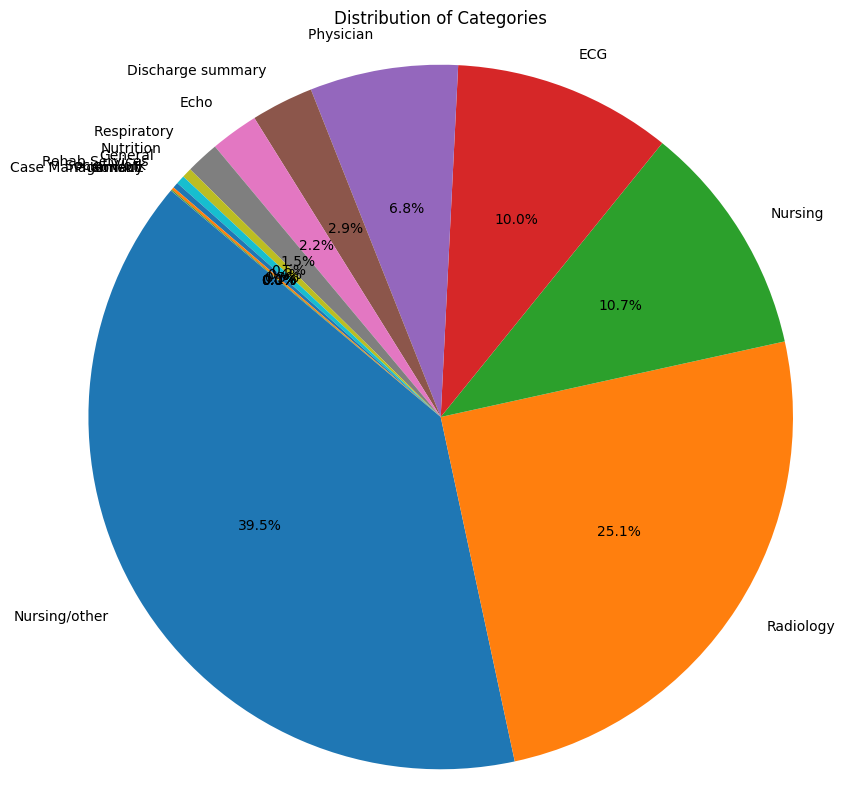

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.pie(categories, labels=categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')
plt.show()

In [12]:
proced_df = pd.read_csv(procedures_path)
proced_df.shape

(240095, 5)

In [13]:
proced_df.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE'], dtype='object')

In [14]:
proced_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,944,62641,154460,3,3404
1,945,2592,130856,1,9671
2,946,2592,130856,2,3893
3,947,55357,119355,1,9672
4,948,55357,119355,2,331


In [15]:
discharge_df = event_df[event_df['CATEGORY'] == 'Discharge summary']
discharge_df.shape

(59652, 11)

In [16]:
discharge_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [17]:
icd_data = pd.concat([dia_df, proced_df])

In [18]:
icd_data

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
240090,228330,67415,150871,5.0,3736
240091,228331,67415,150871,6.0,3893
240092,228332,67415,150871,7.0,8872
240093,228333,67415,150871,8.0,3893


In [19]:
merged_data = discharge_df.merge(icd_data[['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE']],
                                 on=['SUBJECT_ID', 'HADM_ID'],
                                 how='left')

merged_data

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,ICD9_CODE
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...,01193
1,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...,4254
2,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...,42731
3,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...,2639
4,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...,2762
...,...,...,...,...,...,...,...,...,...,...,...,...
962678,59623,73790,157100.0,2113-07-18,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 12459**],[**Known fir...",E9319
962679,59623,73790,157100.0,2113-07-18,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 12459**],[**Known fir...",4513
962680,59623,73790,157100.0,2113-07-18,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 12459**],[**Known fir...",9604
962681,59623,73790,157100.0,2113-07-18,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 12459**],[**Known fir...",4233


In [20]:
group_df = merged_data.groupby(['SUBJECT_ID', 'HADM_ID', 'TEXT'])['ICD9_CODE'].agg(list).reset_index()

In [21]:
group_df

,SUBJECT_ID,HADM_ID,TEXT,ICD9_CODE
0,3,145834.0,Admission Date: [**2101-10-20**] Discharg...,"[0389, 78559, 5849, 4275, 41071, 4280, 6826, 4..."
1,4,185777.0,Admission Date: [**2191-3-16**] Discharge...,"[042, 1363, 7994, 2763, 7907, 5715, 04111, V09..."
2,6,107064.0,Admission Date: [**2175-5-30**] Dischar...,"[40391, 4440, 9972, 2766, 2767, 2859, 2753, V1..."
3,9,150750.0,Admission Date: [**2149-11-9**] Dischar...,"[431, 5070, 4280, 5849, 2765, 4019, 9672, 9604]"
4,9,150750.0,"Name: [**Known lastname 10050**], [**Known fi...","[431, 5070, 4280, 5849, 2765, 4019, 9672, 9604]"
...,...,...,...,...
59563,99985,176670.0,Admission Date: [**2181-1-27**] ...,"[0389, 51881, 48241, 4870, 78552, V4281, 99592..."
59564,99991,151118.0,Admission Date: [**2184-12-24**] ...,"[56211, 0389, 5570, 5849, 99592, 56081, 78959,..."
59565,99992,197084.0,Admission Date: [**2144-7-25**] ...,"[9999, 56881, 5772, 2851, 5849, 5799, 72992, 5..."
59566,99995,137810.0,Admission Date: [**2147-2-8**] D...,"[4414, 42833, 99812, 2851, 4241, 25000, 99811,..."


In [22]:
#group_df.to_csv('ICD_Codes_merged.csv')

In [23]:
import pandas as pd
#df=pd.read_csv('ICD_Codes_merged.csv')

In [26]:
df=group_df
from collections import Counter

icd_code_lists = df['ICD9_CODE']

all_icd_codes = [code for sublist in icd_code_lists for code in sublist]

icd_code_counts = Counter(all_icd_codes)

top_50_icd_codes = [code for code, count in icd_code_counts.most_common(50)]

print("Top 50 ICD Codes:", top_50_icd_codes)


Top 50 ICD Codes: ['4019', 3893, '4280', '42731', '41401', 9604, 966, '5849', '25000', 9671, '2724', '51881', 9904, 3961, '5990', 9672, '53081', '2720', 8856, '2859', '486', 3891, '2449', 3615, 9915, '2851', '496', '2762', '5070', 8872, '99592', 'V5861', '0389', 3722, 3324, '311', 3995, '5859', '40390', '3051', '412', '41071', '2875', '2761', '4240', 4513, 'V4581', 3723, '5119', 9390]


In [29]:
def contains_at_least_five_top_icd_codes(codes):
    top_codes_count = sum(1 for code in codes if code in top_50_icd_codes)
    return top_codes_count >= 10

common_df = df[df['ICD9_CODE'].apply(contains_at_least_five_top_icd_codes)]

# Split into training and test sets
train_df = common_df.sample(frac=0.8, random_state=42)
test_df = common_df.drop(train_df.index)

print("Training instances:", len(train_df))
print("Test instances:", len(test_df))



Training instances: 6333
Test instances: 1583


In [30]:

few_shot_train_df = train_df.sample(frac=0.125, random_state=42)

print("Few-Shot Training instances:", len(few_shot_train_df))
print("Few-Shot Test instances:", len(test_df))


Few-Shot Training instances: 792
Few-Shot Test instances: 1583


In [32]:

rare_threshold = 2

rare_icd_codes = [code for code, count in icd_code_counts.items() if count < rare_threshold]

print("Number of rare ICD codes:", len(rare_icd_codes))

def contains_rare_icd_codes(codes):
    return any(code in rare_icd_codes for code in codes)

rare_df = df[df['ICD9_CODE'].apply(contains_rare_icd_codes)]

print("Rare ICD Training instances:", len(rare_df))


Number of rare ICD codes: 1710
Rare ICD Training instances: 1511


In [33]:

ICD_codes = merged_data['ICD9_CODE'].unique()

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer
test_row = group_df.iloc[0:2, -1]
mlb = MultiLabelBinarizer(classes=ICD_codes, sparse_output=False)
z = mlb.fit_transform(test_row)

In [37]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.sparse import csr_matrix


class MultiLabel_Encoding():
    def __init__(self, all_labels) -> None:
        self.all_labels = all_labels
        self.mlb = MultiLabelBinarizer(classes=all_labels, sparse_output=False)
        # self.csr = None

    def fit_transform(self, labels):
        encoded_labels = self.mlb.fit_transform(labels)     
        # self.csr = csr_matrix(encoded_labels)
        return encoded_labels
    
    
    def add_transform(self, df, target_column, end_point_column):
        labels = df[target_column].tolist()

        encoded_label = self.fit_transform(labels=labels)
        df[end_point_column] = pd.Series([x for x in encoded_label], index=df.index)
        
        return df

In [38]:
MLP = MultiLabel_Encoding(all_labels=ICD_codes)
MLP.add_transform(df=train_df, target_column='ICD9_CODE', end_point_column='y')

,SUBJECT_ID,HADM_ID,TEXT,ICD9_CODE,y
44864,55677,108847.0,Admission Date: [**2134-4-5**] D...,"[4280, 41071, 58089, 2875, 2761, 4168, 04112, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
44695,55122,160937.0,Admission Date: [**2192-3-27**] ...,"[99639, 41041, 9971, 99859, 99832, 42832, 5180...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
14744,11892,193055.0,Admission Date: [**2152-6-26**] Dischar...,"[41071, 4280, 78551, 99672, 4260, 7907, 41401,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
17182,13913,153057.0,Admission Date: [**2152-3-9**] Discharg...,"[1536, 1962, 41081, 4280, 496, 4241, 41401, 74...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ..."
26504,21553,188632.0,Admission Date: [**2184-12-24**] ...,"[0389, 78552, 41071, 78959, 5990, 5849, 486, 5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
...,...,...,...,...,...
39099,32377,178842.0,Admission Date: [**2139-3-11**] ...,"[99811, 07071, 51881, 5849, 51189, 99731, 2918...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ..."
43855,52739,178685.0,Admission Date: [**2149-9-26**] ...,"[41401, 2875, 4111, V4582, 4019, 2720, 53081, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
12517,10168,199365.0,Admission Date: [**2111-1-8**] Discharg...,"[51881, E9420, 4821, 1175, 5789, 42731, 5990, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, ..."
56694,91383,111457.0,Admission Date: [**2195-5-25**] ...,"[41071, 42833, 51881, 5849, 72888, 2762, 4280,...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


In [ ]:
import openai
import pandas as pd
import tiktoken  # to count tokens

data = MLP

openai.api_key = 'sk-proj-kNGplqAIvkjykAhtP23AT3BlbkFJjZKQu5IeDyDjZXUJAWZz'

def count_tokens(text, model="gpt-3.5-turbo"):
    enc = tiktoken.get_encoding(model)
    tokens = enc.encode(text)
    return len(tokens)

def prepare_prompt(note, candidates):
    return f"""
    As a proficient clinical coding professional, it is your responsibility to assign ICD 9 codes given the CLINICAL NOTE from the CANDIDATE LIST provided below.
    —
    CLINICAL NOTE (or partial):
    {note}
    —
    Here is a CANDIDATE LIST of 50 ICD 9 codes and their associated descriptions to assign:
    {candidates}
    —
    For each disease/procedure based on the context in CLINICAL NOTE, you must generate a list of strings containing the ICD 9 codes you assigned.
    """

candidate_list = """
    V70.0 - Routine Medical Exam
    V76.2 - Screening for Malignant Neoplasm of Cervix
    401.1 - Benign Hypertension
    V76.44 - Screening for Malignant Neoplasm of Prostate
    250.00 - Diabetes Mellitus without Complications, Type II or Unspecified Type
    401.9 - Hypertension, Unspecified
    780.79 - Other Malaise and Fatigue
    599.0 - Urinary Tract Infection, Site Not Specified
    272.4 - Other and Unspecified Hyperlipidemia
    V72.60 - Laboratory Examination, Unspecified
    244.9 - Hypothyroidism, Unspecified
    V58.69 - Long-term (current) Use of Other Medications
    788.1 - Dysuria
    272.2 - Mixed Hyperlipidemia
    272.0 - Pure Hypercholesterolemia
    268.9 - Unspecified Vitamin D Deficiency
    462 - Acute Pharyngitis
    250.02 - Diabetes Mellitus without Complications, Type II or Unspecified Type, Uncontrolled
    V58.61 - Long-term (current) Use of Anticoagulants
    789.00 - Abdominal Pain, Unspecified Site
    285.9 - Anemia, Unspecified
    427.31 - Atrial Fibrillation
    599.70 - Hematuria, Unspecified
    787.91 - Diarrhea
    780.60 - Fever, Unspecified
    V69.2 - High Risk Sexual Behavior
    V72.62 - Laboratory Examination, General Medical Examination
    790.6 - Abnormal Blood Chemistry
    595.0 - Acute Cystitis
    257.2 - Testicular Hypofunction
    244.8 - Acquired Hypothyroidism
    616.10 - Vaginitis and Vulvitis, Unspecified
    V20.2 - Routine Child Health Examination
    786.2 - Cough
    790.29 - Other Abnormal Glucose
    530.81 - Esophageal Reflux
    V73.88 - Screening for Chlamydial Disease
    782.3 - Edema
    V77.91 - Screening for Lipoid Disorders
    780.4 - Dizziness and Giddiness
    V72.31 - Routine Gynecological Examination
    V22.1 - Supervision of Other Normal Pregnancy
    280.9 - Iron Deficiency Anemia, Unspecified
    300.00 - Anxiety State, Unspecified
    682.9 - Cellulitis and Abscess, Unspecified
    789.07 - Abdominal Pain, Generalized
    719.40 - Pain in Joint, Unspecified
    788.41 - Urinary Frequency
    784.0 - Headache
    783.1 - Abnormal Weight Gain
"""

def split_text(text, max_tokens, model="gpt-3.5-turbo"):
    enc = tiktoken.get_encoding(model)
    tokens = enc.encode(text)
    split_texts = []
    
    if len(tokens) > max_tokens:
        start = 0
        while start < len(tokens):
            end = start + max_tokens
            split_texts.append(enc.decode(tokens[start:end]))
            start = end
    else:
        split_texts.append(text)
    
    return split_texts

def process_notes(data, candidate_list, model="gpt-3.5-turbo", max_tokens=4096, test_rows=10):
    results = []
    total_tokens = 0

    for index, row in data.iterrows():
        if index >= test_rows:
            break
        
        note = row['TEXT']
        subject_id = row['SUBJECT_ID']
        hadm_id = row['HADM_ID']
        
        prompt = prepare_prompt(note, candidate_list)
        token_count = count_tokens(prompt, model)
        
        if token_count > max_tokens:
            split_notes = split_text(note, max_tokens - count_tokens(prepare_prompt("", candidate_list), model), model)
        else:
            split_notes = [note]
        
        for part in split_notes:
            prompt = prepare_prompt(part, candidate_list)
            token_count = count_tokens(prompt, model)
            total_tokens += token_count
            
            response = openai.chat.completions.create(
                model=model,
                messages=[
                    {"role": "system", "content": "You are a clinical coding professional."},
                    {"role": "user", "content": prompt}
                ],
                max_tokens=1024
            )
            
            icd_codes = response['choices'][0]['message']['content'].strip()
            results.append((subject_id, hadm_id, icd_codes, token_count))
            
    return results, total_tokens

results, total_tokens = process_notes(data, candidate_list)

for res in results:
    print(f"Subject ID: {res[0]}, HADM ID: {res[1]}, ICD Codes: {res[2]}, Tokens Used: {res[3]}")
print(f"Total tokens: {total_tokens}")